In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')
#no missing values in the data

In [4]:
#convert dataframe to numpy array
X=X.values
X.shape 

(3841, 187)

In [5]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [6]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

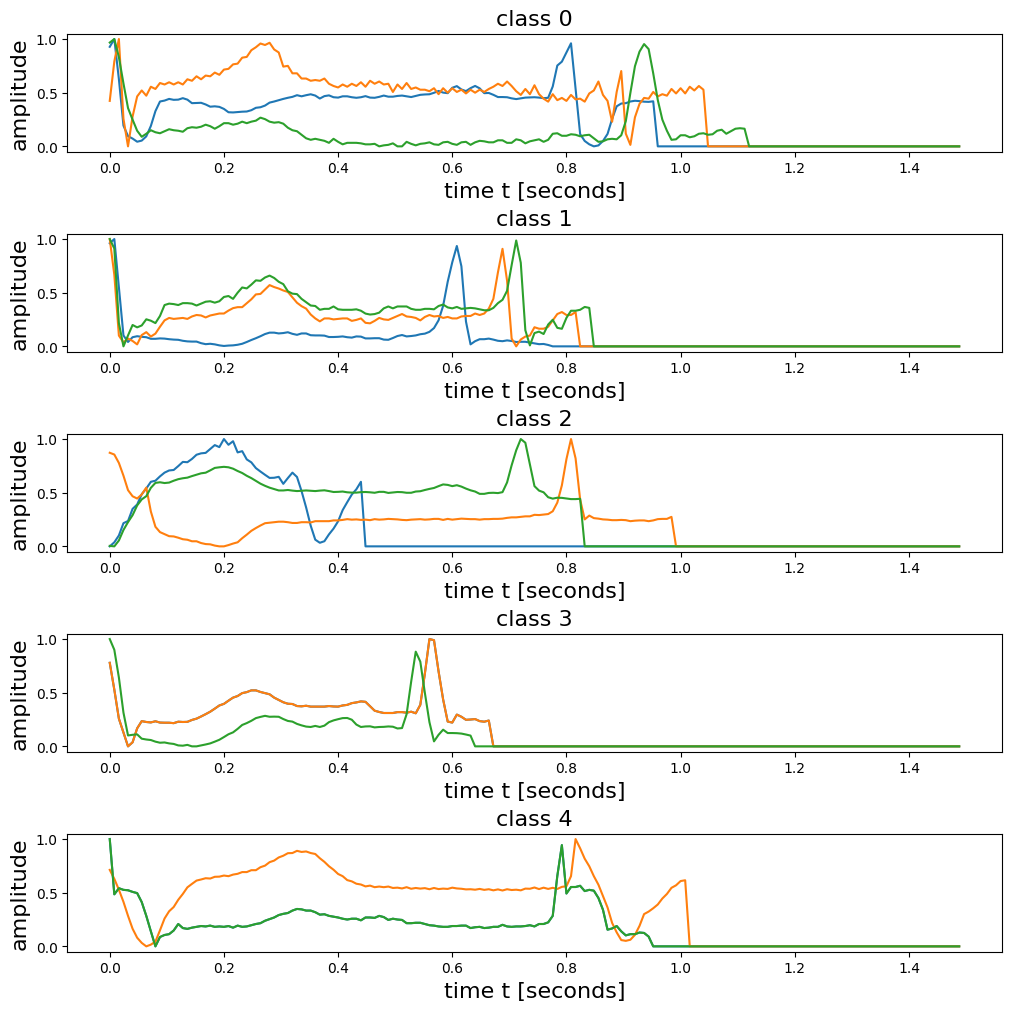

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [9]:
[X_train.min(), X_train.max()] #no need for normalization

[0.0, 1.0]

In [10]:
Y_train.shape

(3072,)

In [11]:
[Y_train.min(), Y_train.max()] #5 classes

[0, 4]

In [12]:
[X_test.min(), X_test.max()] #no need for normalization

[0.0, 1.0]

In [13]:
Y_test.shape

(769,)

In [14]:
[Y_test.min(), Y_test.max()] #5 classes

[0, 4]

Build 4 classifiers to classify the ECG Signals into 5 classes. Use default parameters

KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, Y_train)

Y_test_pred_knn = knn.predict(X_test)

knn_train = knn.score(X_train, Y_train)

In [66]:
knn_test = knn.score(X_test, Y_test)

Logistic regression

In [83]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(fit_intercept = True, max_iter = 10000)

In [84]:
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

In [85]:
# test the regressor
Y_test_pred_log = logistic_model.predict(X_test)

lm_test = logistic_model.score(X_test, Y_test)

In [86]:
lm_train = logistic_model.score(X_train, Y_train)

Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)

In [88]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10)

In [89]:
# test the regressor
Y_test_pred_dt = dtree.predict(X_test)

dt_test = dtree.score(X_test, Y_test)

In [90]:
dt_train = dtree.score(X_train, Y_train)

Random Forest 

In [91]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=100, random_state=0)
RF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, max_samples=0.8, random_state=0)

In [92]:
Y_test_pred_rf = RF.predict(X_test)

In [93]:
rf_train = RF.score(X_train, Y_train)

In [94]:
rf_test = RF.score(X_test, Y_test)

In [96]:
dict = {'KNN': [knn_train, knn_test], 
        'LogisticRegression': [lm_train, lm_test],
        'DecisionTreeClassifier':[dt_train, dt_test],
        'RandomForestClassifier':[rf_train, rf_test]}

results = pd.DataFrame(dict, index = ['training accuracy', 'test accuracy'])
results

,KNN,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier
training accuracy,0.851562,0.771484,0.954102,0.999674
test accuracy,0.863459,0.765930,0.836151,0.903771
